## Trajectory visualization
This notebook is for visualizing the trajectories saved during training / evaluation.

In [11]:
import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, str(Path("..").resolve()))
from gpairls.webots.robot_env import utils

**Set** `TRAJ_PATH` to the path of your trajectory file:

In [4]:
# SET THIS
TRAJ_PATH = "../logs/1500k/step-1500000_reward-0.0.npz"

In [5]:
traj = np.load(TRAJ_PATH)

for k, v in traj.items():
    print(f"{k:12}: {v.shape}")

obs         : (1800, 4, 128, 128)
embs        : (1800, 1, 32)
actions     : (1800, 1)
rewards     : (1800,)


In [14]:
obs = traj["obs"].transpose(0, 2, 3, 1)
embs = traj["embs"].squeeze()
actions = traj["actions"].squeeze()
rewards = traj["rewards"]

obs.shape, embs.shape, actions.shape, rewards.shape

((1800, 128, 128, 4), (1800, 32), (1800,), (1800,))

In [36]:
def plot_obs(obs):
    """Plot single observation"""
    fig, axs = plt.subplots(1, 2)
    axs[0].imshow(obs[..., :3])
    axs[1].imshow(obs[..., -1], cmap="gray_r")

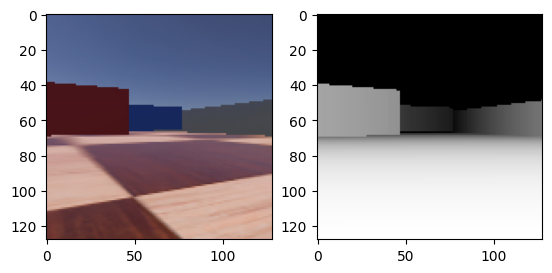

In [44]:
plot_obs(obs[20])